# Actividad 6 : Redes Neuronales

Johan Ronaldo Padilla Castañeda - 2109556


Inteligencia Artificial y Redes Neuronales - N1

Grupo: 007


---
### Objetivo:
Entrenar un modelo de Red Neuronal Convolucional.

---



1. Cargar Librerías

In [76]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation,Conv2D,MaxPooling2D,Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


2. Cargar Datos

In [77]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [78]:
label_names = ["Cero", "Uno", "Dos", "Tres", "Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"]

3. Preprocesamiento de Datos

In [79]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

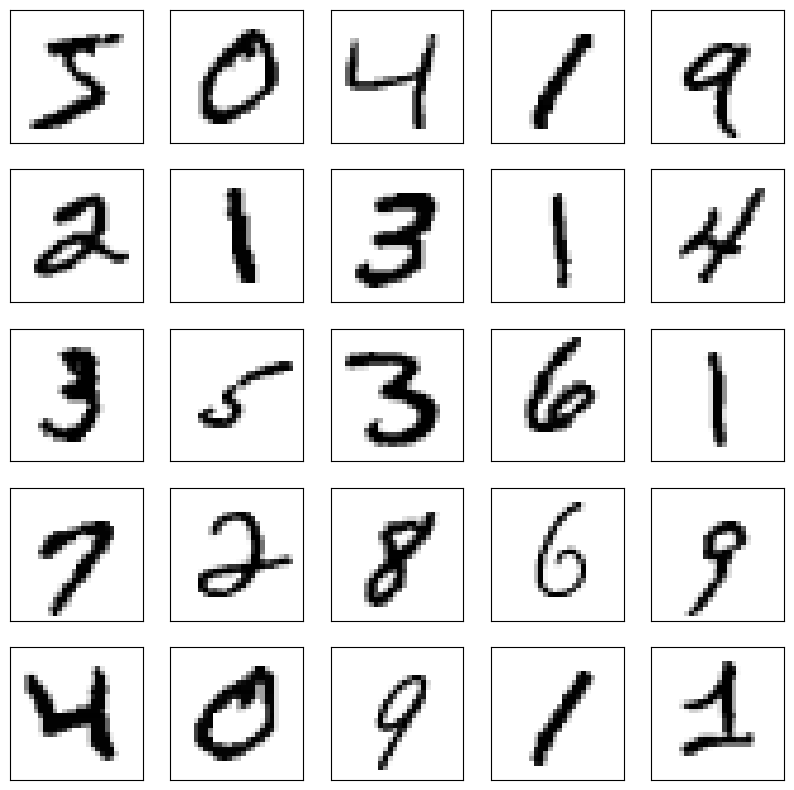

In [80]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

4. Selección y entrenamiento del Modelo

In [81]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]),
    Activation('relu'),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 206s 423ms/step - loss: 0.1440 - accuracy: 0.9555 - val_loss: 0.0614 - val_accuracy: 0.9809
Epoch 2/10
469/469 [==============================] - 223s 476ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 3/10
469/469 [==============================] - 199s 425ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0303 - val_accuracy: 0.9899
Epoch 4/10
469/469 [==============================] - 201s 428ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 5/10
469/469 [==============================] - 188s 401ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0265 - val_accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 184s 392ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0261 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 187s 398ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0285 -

5. Prueba de Modelo

In [84]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Exactitud del modelo:', test_acc)

313/313 [==============================] - 10s 31ms/step - loss: 0.0248 - accuracy: 0.9941
Exactitud del modelo: 0.9940999746322632


1/1 [==============================] - 1s 564ms/step


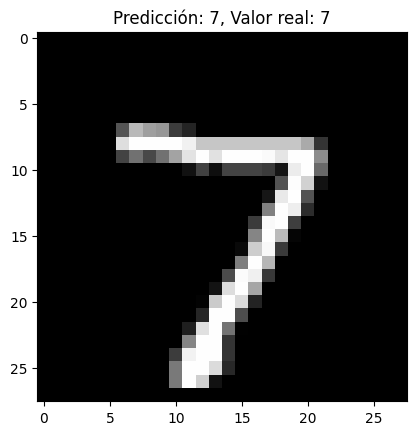

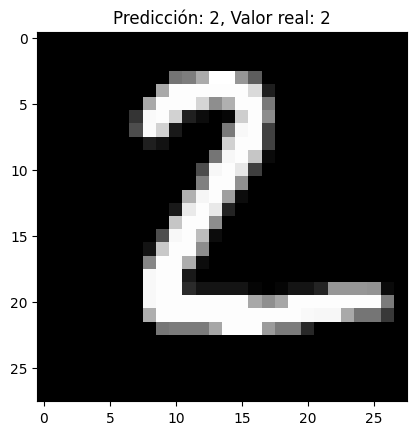

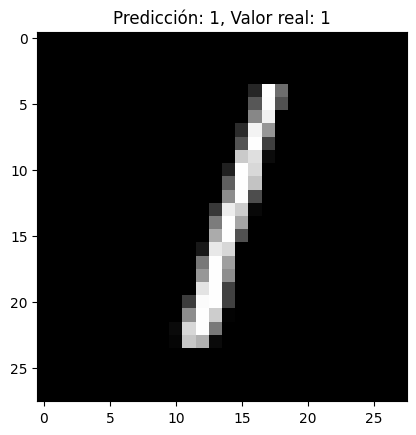

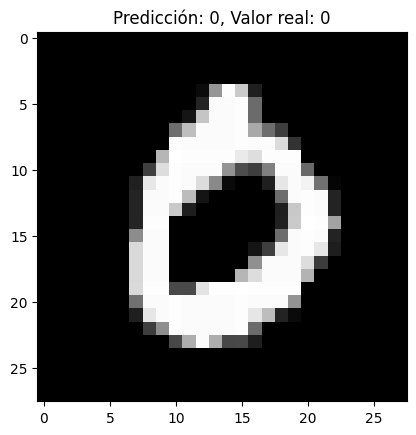

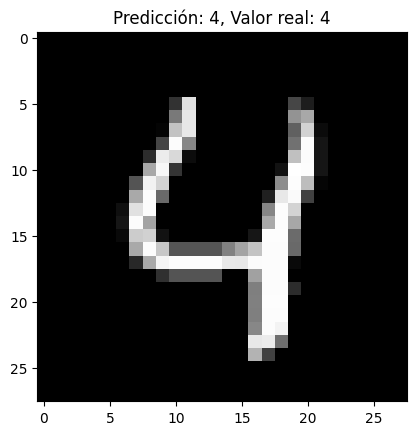

In [ ]:
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title('Predicción: {}, Valor real: {}'.format(tf.argmax(predictions[i]), tf.argmax(y_test[i])))
    plt.show()

*   **¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?**

Se cambió de 9 épocas a 10, aunque solo haya sido el cambio de una época, el tiempo de ejecución es mucho más tardado.


*   **¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?**

Sí se ha obtenido un mejor rendimiento, puesto que en vez de obtener un porcentaje de 98% de exactitud, se ha obtenido un 99.41% de exactitud en esta otra práctica. Considerando que se ha tenido un mejor resultado debido a que el modelo tiene una mejor capacidad de generalización de las redes neuronales.




---


Nota: Las celdas que no se han corrido correctamente, es debido a que se intentó actualizar antes de subir, pero el tiempo de compilación es demasiado largo.